In [1]:
%load_ext autoreload
%autoreload 2

import fastai
from fastai import *
from fastai.vision import *

In [2]:
fastai.__version__

'1.0.58.dev0'

In [3]:
lesson_dir_path = Path('/home/blaberj/fastai_course/lesson1-mnist')
data_dir_path = untar_data(URLs.MNIST_SAMPLE, dest=lesson_dir_path)

In [4]:
tfms = get_transforms(do_flip=False)

In [5]:
data = (ImageList.from_folder(path=data_dir_path)
                 .split_by_folder()
                 .label_from_folder()
                 .transform(tfms, padding_mode='zeros')
                 .databunch()
                 .normalize())

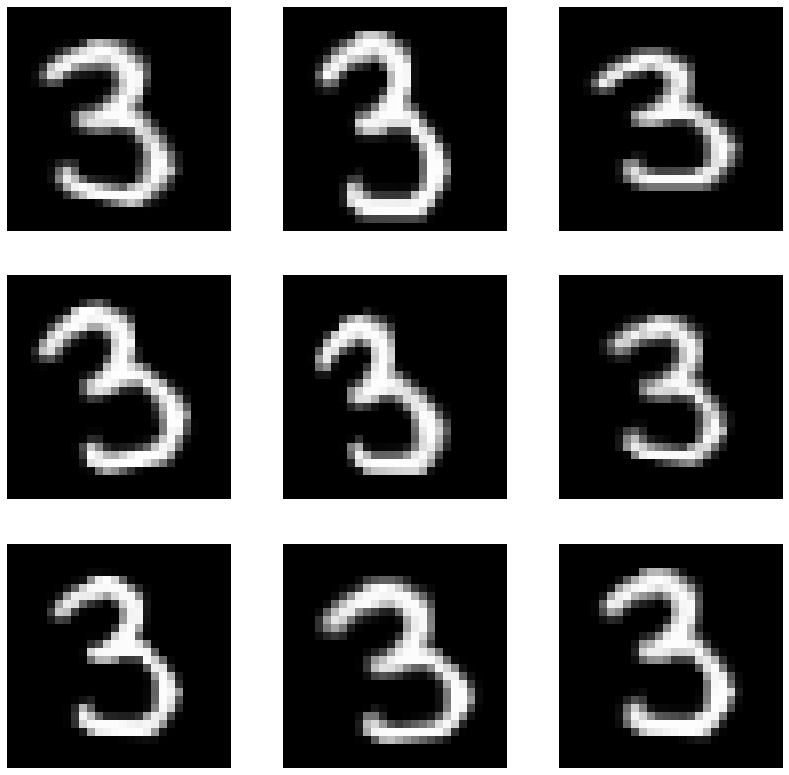

In [6]:
plot_multi(lambda i,j,ax : data.train_ds[2][0].show(ax), 3, 3, figsize=(14,14))

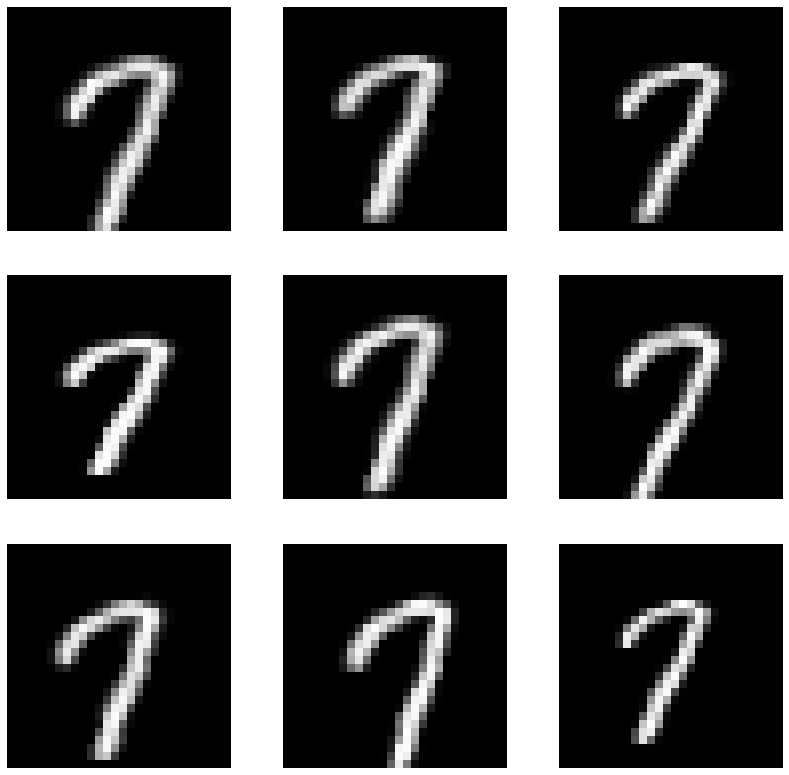

In [7]:
plot_multi(lambda i,j,ax : data.train_ds[8000][0].show(ax), 3, 3, figsize=(14,14))

# Resnet18

### Try defaults; do not use pretrained

In [8]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy, pretrained=False)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


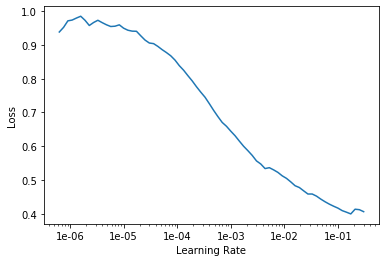

In [9]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [10]:
lr = 1e-3
learn.fit_one_cycle(10, lr)

epoch,train_loss,valid_loss,accuracy,time
0,0.072311,0.025337,0.991168,00:04
1,0.054357,0.036357,0.989205,00:04
2,0.039563,0.046650,0.981354,00:04
3,0.029314,0.033081,0.988224,00:04
4,0.028692,0.025037,0.992149,00:04
5,0.015842,0.011578,0.997056,00:04
6,0.013812,0.006469,0.997056,00:04
7,0.007993,0.002611,0.999509,00:04
8,0.002795,0.000602,0.999509,00:04
9,0.002724,0.000437,1.000000,00:04
